In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
credito = pd.read_excel('/content/Cópia de Limite_Credito_Dummy.xlsx')
credito.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
0,70,10736,5214,400,Fundamental_Medio,RJ,F,500
1,68,5000,5000,380,Fundamental_Medio,RJ,F,600
2,44,5800,5800,500,Fundamental_Medio,RJ,F,800
3,72,4300,4300,2000,Fundamental_Medio,RJ,F,1000
4,75,4400,4400,3000,Fundamental_Medio,RJ,F,1000


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
le.fit(credito.Escolaridade)
credito.Escolaridade = le.transform(credito.Escolaridade)

le.fit(credito.Gênero)
credito.Gênero = le.transform(credito.Gênero)

le.fit(credito.Região)
credito.Região = le.transform(credito.Região)

In [ ]:
credito.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
0,70,10736,5214,400,0,0,0,500
1,68,5000,5000,380,0,0,0,600
2,44,5800,5800,500,0,0,0,800
3,72,4300,4300,2000,0,0,0,1000
4,75,4400,4400,3000,0,0,0,1000


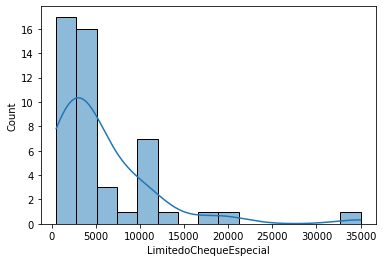

In [ ]:
sns.histplot(credito, x = 'LimitedoChequeEspecial', kde = True)

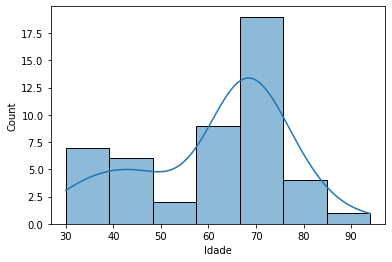

In [ ]:
sns.histplot(credito, x = 'Idade', kde = True)

In [ ]:
credito.describe()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,61.458333,12275.083333,10507.125000,2175.208333,0.375000,0.458333,0.500000,5620.729167
std,15.284477,12640.654241,9332.173617,938.094469,0.489246,0.503534,0.505291,6131.900367
min,30.000000,4300.000000,4027.000000,340.000000,0.000000,0.000000,0.000000,500.000000
25%,47.000000,6380.000000,5950.000000,1925.000000,0.000000,0.000000,0.000000,2262.500000
50%,66.500000,8400.000000,7400.000000,2000.000000,0.000000,0.000000,0.500000,3550.000000
75%,70.000000,12378.250000,10163.000000,3000.000000,1.000000,1.000000,1.000000,6500.000000
max,94.000000,81000.000000,54500.000000,3500.000000,1.000000,1.000000,1.000000,35000.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
creditoNorm = pd.DataFrame(scaler.fit_transform(credito), index = credito.index, columns = credito.columns)

In [ ]:
creditoNorm.describe()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,Escolaridade,Gênero,Região,LimitedoChequeEspecial
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.491536,0.103978,0.128388,0.580762,0.375000,0.458333,0.500000,0.148427
std,0.238820,0.164806,0.184894,0.296865,0.489246,0.503534,0.505291,0.177736
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.265625,0.027119,0.038100,0.501582,0.000000,0.000000,0.000000,0.051087
50%,0.570312,0.053455,0.066828,0.525316,0.000000,0.000000,0.500000,0.088406
75%,0.625000,0.105323,0.121570,0.841772,1.000000,1.000000,1.000000,0.173913
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
import statsmodels.formula.api as smf

In [ ]:
function = 'LimitedoChequeEspecial~Idade+RendimentoTotal+Salario+LimitedeCreditoImediato+Escolaridade+Gênero+Região'

In [ ]:
model = smf.ols(formula = function, data = creditoNorm).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.886
Model:                                OLS   Adj. R-squared:                  0.865
Method:                     Least Squares   F-statistic:                     44.20
Date:                    Fri, 11 Nov 2022   Prob (F-statistic):           7.44e-17
Time:                            20:27:43   Log-Likelihood:                 67.328
No. Observations:                      48   AIC:                            -118.7
Df Residuals:                          40   BIC:                            -103.7
Df Model:                               7                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [ ]:
function = 'LimitedoChequeEspecial~RendimentoTotal+Salario+LimitedeCreditoImediato+Escolaridade+Gênero+Região'
model = smf.ols(formula = function, data = creditoNorm).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.885
Model:                                OLS   Adj. R-squared:                  0.869
Method:                     Least Squares   F-statistic:                     52.78
Date:                    Fri, 11 Nov 2022   Prob (F-statistic):           9.97e-18
Time:                            20:28:17   Log-Likelihood:                 67.299
No. Observations:                      48   AIC:                            -120.6
Df Residuals:                          41   BIC:                            -107.5
Df Model:                               6                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [ ]:
function = 'LimitedoChequeEspecial~RendimentoTotal+Salario+Escolaridade+Gênero+Região'
model = smf.ols(formula = function, data = creditoNorm).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.884
Model:                                OLS   Adj. R-squared:                  0.871
Method:                     Least Squares   F-statistic:                     64.26
Date:                    Fri, 11 Nov 2022   Prob (F-statistic):           1.39e-18
Time:                            20:28:35   Log-Likelihood:                 67.097
No. Observations:                      48   AIC:                            -122.2
Df Residuals:                          42   BIC:                            -111.0
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
In

In [ ]:
function = 'LimitedoChequeEspecial~RendimentoTotal+Salario+Gênero+Região'
model = smf.ols(formula = function, data = creditoNorm).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.883
Model:                                OLS   Adj. R-squared:                  0.872
Method:                     Least Squares   F-statistic:                     80.75
Date:                    Fri, 11 Nov 2022   Prob (F-statistic):           2.02e-19
Time:                            20:28:50   Log-Likelihood:                 66.709
No. Observations:                      48   AIC:                            -123.4
Df Residuals:                          43   BIC:                            -114.1
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
In

In [ ]:
function = 'LimitedoChequeEspecial~Salario+Gênero+Região'
model = smf.ols(formula = function, data = creditoNorm).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.879
Model:                                OLS   Adj. R-squared:                  0.871
Method:                     Least Squares   F-statistic:                     106.7
Date:                    Fri, 11 Nov 2022   Prob (F-statistic):           3.24e-20
Time:                            20:29:16   Log-Likelihood:                 66.039
No. Observations:                      48   AIC:                            -124.1
Df Residuals:                          44   BIC:                            -116.6
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

In [ ]:
function = 'LimitedoChequeEspecial~Salario+Gênero+Região - 1'
model = smf.ols(formula = function, data = creditoNorm).fit()
print(model.summary())

                                   OLS Regression Results                                  
Dep. Variable:     LimitedoChequeEspecial   R-squared (uncentered):                   0.925
Model:                                OLS   Adj. R-squared (uncentered):              0.920
Method:                     Least Squares   F-statistic:                              185.0
Date:                    Fri, 11 Nov 2022   Prob (F-statistic):                    2.56e-25
Time:                            20:29:52   Log-Likelihood:                          64.573
No. Observations:                      48   AIC:                                     -123.1
Df Residuals:                          45   BIC:                                     -117.5
Df Model:                               3                                                  
Covariance Type:                nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-

In [ ]:
x = creditoNorm[['Salario', 'Gênero', 'Região']]
y = creditoNorm[['LimitedoChequeEspecial']]


In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [ ]:
lr = LinearRegression()

lr.fit(x, y)

LinearRegression()

In [ ]:
r_sqr = lr.score(x, y)
r_sqr

0.8791882143098557

In [ ]:
yPredTrain = lr.predict(xTrain)
print('MAE: ', metrics.mean_absolute_error(yTrain, yPredTrain))
print('MSE: ', metrics.mean_squared_error(yTrain, yPredTrain))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(yTrain, yPredTrain)))

MAE:  0.03535260038720454
MSE:  0.0024122510423403173
RMSE:  0.04911467237333786


In [ ]:
yPredTest = lr.predict(xTest)
print('MAE: ', metrics.mean_absolute_error(yTest, yPredTest))
print('MSE: ', metrics.mean_squared_error(yTest, yPredTest))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(yTest, yPredTest)))

MAE:  0.06543044287056327
MSE:  0.008770831909357938
RMSE:  0.09365271971148482


In [ ]:
preco = pd.read_csv('/content/C+¦pia de CarPrice_Assignment.csv')
preco.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
preco.cylindernumber

0      four
1      four
2       six
3      four
4      five
       ... 
200    four
201    four
202     six
203     six
204    four
Name: cylindernumber, Length: 205, dtype: object

In [ ]:
preco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
preco.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
le = LabelEncoder()

In [ ]:
le.fit(preco.CarName)
preco.CarName = le.transform(preco.CarName)

le.fit(preco.fueltype)
preco.fueltype = le.transform(preco.fueltype)

le.fit(preco.aspiration)
preco.aspiration = le.transform(preco.aspiration)

le.fit(preco.doornumber)
preco.doornumber = le.transform(preco.doornumber)

le.fit(preco.carbody)
preco.carbody = le.transform(preco.carbody)

le.fit(preco.drivewheel)
preco.drivewheel = le.transform(preco.drivewheel)

le.fit(preco.enginelocation)
preco.enginelocation = le.transform(preco.enginelocation)

le.fit(preco.enginetype)
preco.enginetype = le.transform(preco.enginetype)

le.fit(preco.cylindernumber)
preco.cylindernumber = le.transform(preco.cylindernumber)

le.fit(preco.fuelsystem)
preco.fuelsystem = le.transform(preco.fuelsystem)


In [ ]:
preco.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
scaler = MinMaxScaler()
precoNorm = pd.DataFrame(scaler.fit_transform(preco), index = preco.index, columns = preco.columns)
precoNorm.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.000000,1.0,0.013699,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,...,0.260377,0.714286,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.207959
1,0.004902,1.0,0.020548,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,...,0.260377,0.714286,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.282558
2,0.009804,0.6,0.006849,1.0,0.0,1.0,0.50,1.0,0.0,0.230321,...,0.343396,0.714286,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,0.282558
3,0.014706,0.8,0.027397,1.0,0.0,0.0,0.75,0.5,0.0,0.384840,...,0.181132,0.714286,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,0.219254
4,0.019608,0.8,0.034247,1.0,0.0,0.0,0.75,0.0,0.0,0.373178,...,0.283019,0.714286,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,0.306142


In [ ]:
precoNorm.describe()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.500000,0.566829,0.528834,0.902439,0.180488,0.439024,0.653659,0.663415,0.014634,0.354419,...,0.248707,0.464808,0.564111,0.564483,0.196409,0.233821,0.398009,0.339431,0.388190,0.202540
std,0.290797,0.249061,0.280922,0.297446,0.385535,0.497483,0.214770,0.278085,0.120377,0.175562,...,0.157142,0.287601,0.193460,0.149332,0.248253,0.164767,0.194688,0.181726,0.181222,0.198323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.400000,0.301370,1.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.230321,...,0.135849,0.142857,0.435714,0.495238,0.100000,0.091667,0.265306,0.166667,0.236842,0.066283
50%,0.500000,0.600000,0.547945,1.000000,0.000000,0.000000,0.750000,0.500000,0.000000,0.303207,...,0.222642,0.714286,0.550000,0.580952,0.125000,0.195833,0.428571,0.305556,0.368421,0.128519
75%,0.750000,0.800000,0.787671,1.000000,0.000000,1.000000,0.750000,1.000000,0.000000,0.460641,...,0.301887,0.714286,0.742857,0.638095,0.150000,0.283333,0.551020,0.472222,0.473684,0.282632
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
function = 'price~symboling+CarName+fueltype+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carlength+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+fuelsystem+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg'

In [ ]:
model = smf.ols(formula = function, data = precoNorm).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     66.24
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           2.26e-76
Time:                        21:13:47   Log-Likelihood:                 275.56
No. Observations:                 205   AIC:                            -501.1
Df Residuals:                     180   BIC:                            -418.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.1177      0.191  

In [ ]:
function = 'price~car_ID+symboling+CarName+fueltype+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carlength+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+fuelsystem+boreratio+stroke+horsepower+peakrpm+citympg+highwaympg'
model = smf.ols(formula = function, data = precoNorm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     67.27
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           6.62e-77
Time:                        20:52:43   Log-Likelihood:                 276.98
No. Observations:                 205   AIC:                            -504.0
Df Residuals:                     180   BIC:                            -420.9
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0649      0.093     -0.

In [ ]:
function = 'price~car_ID+symboling+CarName+fueltype+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carlength+carwidth+carheight+curbweight+enginetype+cylindernumber+enginesize+boreratio+stroke+horsepower+peakrpm+citympg+highwaympg'
model = smf.ols(formula = function, data = precoNorm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     70.56
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           8.00e-78
Time:                        20:53:10   Log-Likelihood:                 276.95
No. Observations:                 205   AIC:                            -505.9
Df Residuals:                     181   BIC:                            -426.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0628      0.092     -0.

In [ ]:
function = 'price~car_ID+symboling+CarName+fueltype+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carlength+carwidth+carheight+curbweight+cylindernumber+enginesize+boreratio+stroke+horsepower+peakrpm+citympg+highwaympg'
model = smf.ols(formula = function, data = precoNorm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     74.11
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           9.90e-79
Time:                        20:53:55   Log-Likelihood:                 276.86
No. Observations:                 205   AIC:                            -507.7
Df Residuals:                     182   BIC:                            -431.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0525      0.088     -0.

In [ ]:
function = 'price~car_ID+CarName+fueltype+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carlength+carwidth+carheight+curbweight+cylindernumber+enginesize+boreratio+stroke+horsepower+peakrpm+citympg+highwaympg'
model = smf.ols(formula = function, data = precoNorm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     78.00
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           1.18e-79
Time:                        20:54:29   Log-Likelihood:                 276.79
No. Observations:                 205   AIC:                            -509.6
Df Residuals:                     183   BIC:                            -436.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0439      0.085     -0.

In [ ]:
function = 'price~car_ID+CarName+fueltype+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carlength+carwidth+carheight+curbweight+cylindernumber+enginesize+boreratio+stroke+horsepower+peakrpm+citympg+highwaympg - 1'
model = smf.ols(formula = function, data = precoNorm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              169.5
Date:                Fri, 11 Nov 2022   Prob (F-statistic):                   1.72e-108
Time:                        20:54:49   Log-Likelihood:                          276.64
No. Observations:                 205   AIC:                                     -511.3
Df Residuals:                     184   BIC:                                     -441.5
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [ ]:
function = 'price~car_ID+CarName+fueltype+aspiration+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+cylindernumber+enginesize+boreratio+stroke+horsepower+peakrpm+citympg+highwaympg - 1'
model = smf.ols(formula = function, data = precoNorm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              178.7
Date:                Fri, 11 Nov 2022   Prob (F-statistic):                   1.48e-109
Time:                        20:55:09   Log-Likelihood:                          276.47
No. Observations:                 205   AIC:                                     -512.9
Df Residuals:                     185   BIC:                                     -446.5
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [ ]:
function = 'price~car_ID+CarName+fueltype+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+cylindernumber+enginesize+boreratio+stroke+horsepower+peakrpm+citympg+highwaympg - 1'
model = smf.ols(formula = function, data = precoNorm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                              188.7
Date:                Fri, 11 Nov 2022   Prob (F-statistic):                   1.30e-110
Time:                        20:55:23   Log-Likelihood:                          276.24
No. Observations:                 205   AIC:                                     -514.5
Df Residuals:                     186   BIC:                                     -451.3
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [ ]:
function = 'price~car_ID+CarName+fueltype+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+cylindernumber+enginesize+boreratio+stroke+horsepower+peakrpm+highwaympg - 1'
model = smf.ols(formula = function, data = precoNorm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                              199.8
Date:                Fri, 11 Nov 2022   Prob (F-statistic):                   1.08e-111
Time:                        20:55:40   Log-Likelihood:                          276.04
No. Observations:                 205   AIC:                                     -516.1
Df Residuals:                     187   BIC:                                     -456.3
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [ ]:
function = 'price~car_ID+CarName+fueltype+doornumber+carbody+drivewheel+enginelocation+wheelbase+carwidth+carheight+curbweight+cylindernumber+enginesize+stroke+horsepower+peakrpm+highwaympg - 1'
model = smf.ols(formula = function, data = precoNorm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.950
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                              211.6
Date:                Fri, 11 Nov 2022   Prob (F-statistic):                   1.13e-112
Time:                        20:55:52   Log-Likelihood:                          275.56
No. Observations:                 205   AIC:                                     -517.1
Df Residuals:                     188   BIC:                                     -460.6
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [ ]:
function = 'price~car_ID+CarName+fueltype+doornumber+carbody+drivewheel+enginelocation+carwidth+carheight+curbweight+cylindernumber+enginesize+stroke+horsepower+peakrpm+highwaympg - 1'
model = smf.ols(formula = function, data = precoNorm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.950
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                              224.7
Date:                Fri, 11 Nov 2022   Prob (F-statistic):                   1.26e-113
Time:                        20:56:10   Log-Likelihood:                          274.98
No. Observations:                 205   AIC:                                     -518.0
Df Residuals:                     189   BIC:                                     -464.8
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [ ]:
function = 'price~car_ID+CarName+fueltype+doornumber+carbody+drivewheel+enginelocation+carwidth+carheight+curbweight+cylindernumber+enginesize+stroke+horsepower+peakrpm - 1'
model = smf.ols(formula = function, data = precoNorm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.950
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                              240.6
Date:                Fri, 11 Nov 2022   Prob (F-statistic):                   9.01e-115
Time:                        20:56:28   Log-Likelihood:                          274.85
No. Observations:                 205   AIC:                                     -519.7
Df Residuals:                     190   BIC:                                     -469.9
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [ ]:
function = 'price~car_ID+CarName+fueltype+doornumber+carbody+drivewheel+enginelocation+carwidth+carheight+curbweight+enginesize+stroke+horsepower+peakrpm - 1'
model = smf.ols(formula = function, data = precoNorm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.950
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                              256.9
Date:                Fri, 11 Nov 2022   Prob (F-statistic):                   1.22e-115
Time:                        20:56:40   Log-Likelihood:                          273.99
No. Observations:                 205   AIC:                                     -520.0
Df Residuals:                     191   BIC:                                     -473.5
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [ ]:
function = 'price~CarName+fueltype+doornumber+carbody+drivewheel+enginelocation+carwidth+carheight+curbweight+enginesize+stroke+horsepower+peakrpm - 1'
model = smf.ols(formula = function, data = precoNorm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                              275.2
Date:                Fri, 11 Nov 2022   Prob (F-statistic):                   1.87e-116
Time:                        20:56:52   Log-Likelihood:                          272.96
No. Observations:                 205   AIC:                                     -519.9
Df Residuals:                     192   BIC:                                     -476.7
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [ ]:
function = 'price~CarName+fueltype+carbody+drivewheel+enginelocation+carwidth+carheight+curbweight+enginesize+stroke+horsepower+peakrpm - 1'
model = smf.ols(formula = function, data = precoNorm).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                              295.3
Date:                Fri, 11 Nov 2022   Prob (F-statistic):                   4.09e-117
Time:                        20:57:00   Log-Likelihood:                          271.52
No. Observations:                 205   AIC:                                     -519.0
Df Residuals:                     193   BIC:                                     -479.2
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [ ]:
x = precoNorm[['CarName', 'fueltype', 'carbody', 'drivewheel', 'enginelocation', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'stroke', 'horsepower', 'peakrpm']]
y = precoNorm[['price']]

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
lr = LinearRegression()
lr.fit(xTrain, yTrain)

LinearRegression()

In [ ]:
rsqr = lr.score(xTrain, yTrain)
rsqr

0.9006122728949129

In [ ]:
yPredTrain = lr.predict(xTrain)
print('MAE: ', metrics.mean_absolute_error(yTrain, yPredTrain))
print('MSE: ', metrics.mean_squared_error(yTrain, yPredTrain))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(yTrain, yPredTrain)))

MAE:  0.047694340707822316
MSE:  0.0036528563612492552
RMSE:  0.06043886465883733


In [ ]:
yPredTest = lr.predict(xTest)
print('MAE: ', metrics.mean_absolute_error(yTest, yPredTest))
print('MSE: ', metrics.mean_squared_error(yTest, yPredTest))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(yTest, yPredTest)))

MAE:  0.051519623955268136
MSE:  0.006467718207654581
RMSE:  0.08042212511277341


In [ ]:
rsqr = lr.score(xTest, yTest)
rsqr

0.867060543953886